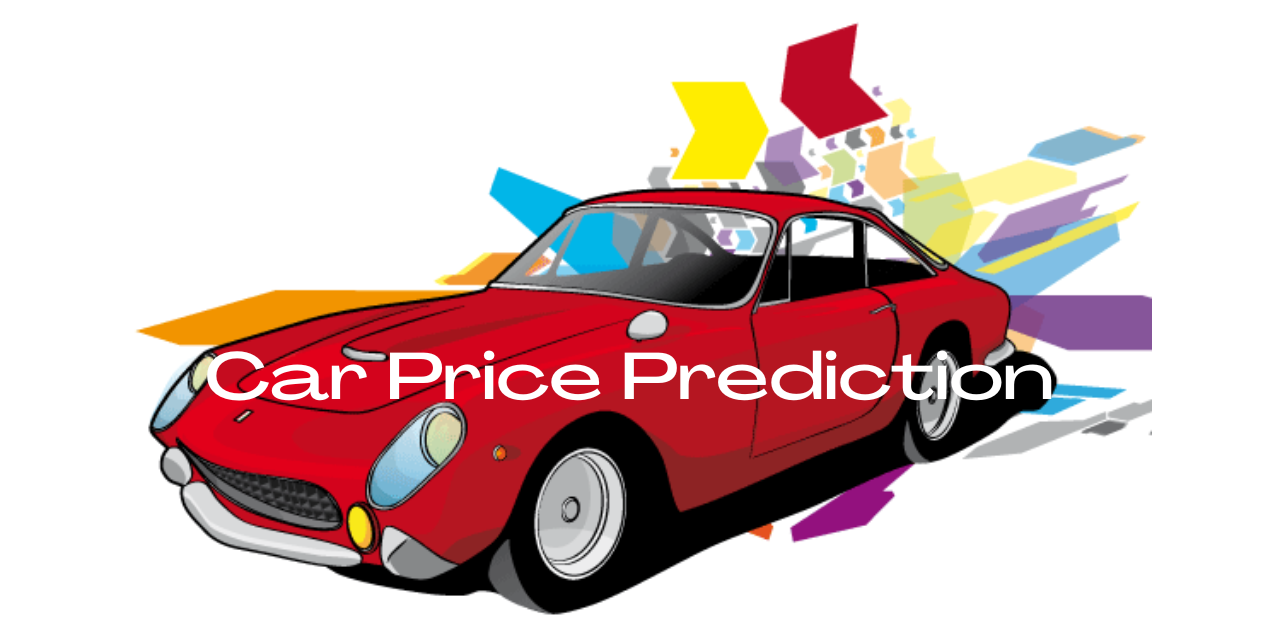

# **Automotive Price Prediction**

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [2]:
df = pd.read_csv("/content/vehicle_price_prediction.csv")
df

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Jeep,Cherokee,2015,130407,176,Manual,Electric,FWD,SUV,Red,Black,2,NaN,Dealer,Excellent,Touring,10,13040.700000,0.040006,10928.88
999996,Dodge,Challenger,2013,276316,211,Manual,Gasoline,RWD,Coupe,Red,Beige,4,Minor,Dealer,Good,Sport,12,23026.333333,0.040035,1827.22
999997,Mercedes-Benz,E-Class,2023,3964,339,Automatic,Electric,AWD,SUV,White,Brown,2,NaN,Dealer,Good,Sport,2,1982.000000,0.039794,48882.42
999998,Volvo,XC90,2019,83674,311,Automatic,Gasoline,AWD,Wagon,Blue,Beige,2,NaN,Dealer,Excellent,Limited,6,13945.666667,0.039842,32195.91


In [3]:
df.shape

(1000000, 20)

In [4]:
df.columns

Index(['make', 'model', 'year', 'mileage', 'engine_hp', 'transmission',
       'fuel_type', 'drivetrain', 'body_type', 'exterior_color',
       'interior_color', 'owner_count', 'accident_history', 'seller_type',
       'condition', 'trim', 'vehicle_age', 'mileage_per_year',
       'brand_popularity', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1000000 non-null  object 
 1   model             1000000 non-null  object 
 2   year              1000000 non-null  int64  
 3   mileage           1000000 non-null  int64  
 4   engine_hp         1000000 non-null  int64  
 5   transmission      1000000 non-null  object 
 6   fuel_type         1000000 non-null  object 
 7   drivetrain        1000000 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  int64  
 12  accident_history  249867 non-null   object 
 13  seller_type       1000000 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 non-null  object 
 16  v

In [6]:
df.describe()

,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,price
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2017.453816,112660.126464,235.664301,3.477846,7.585987,14540.674200,0.040001,20329.302593
std,3.902285,72088.236925,93.614773,1.544856,3.829534,6108.901522,0.000234,13644.467189
min,2000.000000,500.000000,90.000000,1.000000,1.000000,33.333333,0.039318,1500.000000
25%,2015.000000,57654.000000,162.000000,2.000000,5.000000,10487.633523,0.039842,10324.527500
50%,2018.000000,103331.000000,215.000000,4.000000,7.000000,14688.118056,0.040022,17864.740000
75%,2020.000000,157865.000000,300.000000,5.000000,10.000000,18685.942308,0.040148,27601.402500
max,2025.000000,300000.000000,581.000000,5.000000,25.000000,55391.000000,0.040484,93422.090000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
make,0
model,0
year,0
mileage,0
engine_hp,0
transmission,0
fuel_type,0
drivetrain,0
body_type,0
exterior_color,0


In [9]:
df.drop(['accident_history'], axis=1, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
make,0
model,0
year,0
mileage,0
engine_hp,0
transmission,0
fuel_type,0
drivetrain,0
body_type,0
exterior_color,0


In [12]:
# sns.pairplot(df)

In [13]:
numeric_data = df.select_dtypes(include=['number']).columns

In [14]:
categorical_data = df.select_dtypes(include=['object']).columns

# **Numerical Features**

In [15]:
df[numeric_data]

,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,price
0,2016,183903,173,5,9,20433.666667,0.040054,7208.52
1,2010,236643,352,5,15,15776.200000,0.039921,6911.81
2,2016,103199,188,5,9,11466.555556,0.040230,11915.63
3,2016,118889,338,3,9,13209.888889,0.039847,25984.79
4,2018,204170,196,5,7,29167.142857,0.039627,8151.30
...,...,...,...,...,...,...,...,...
999995,2015,130407,176,2,10,13040.700000,0.040006,10928.88
999996,2013,276316,211,4,12,23026.333333,0.040035,1827.22
999997,2023,3964,339,2,2,1982.000000,0.039794,48882.42
999998,2019,83674,311,2,6,13945.666667,0.039842,32195.91


<Axes: >

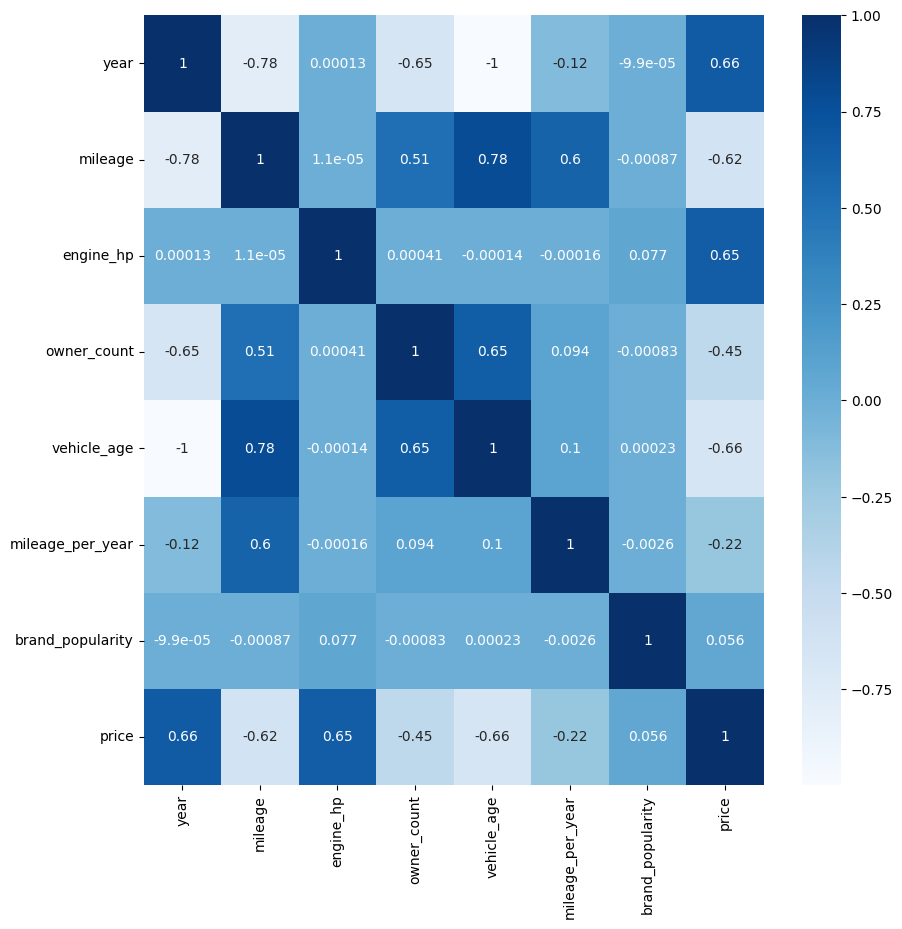

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_data].corr(), annot=True, cmap='Blues')

In [17]:
df.drop(['year', 'mileage'], axis=1, inplace=True)
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,price
0,173,5,9,20433.666667,0.040054,7208.52
1,352,5,15,15776.200000,0.039921,6911.81
2,188,5,9,11466.555556,0.040230,11915.63
3,338,3,9,13209.888889,0.039847,25984.79
4,196,5,7,29167.142857,0.039627,8151.30
...,...,...,...,...,...,...
999995,176,2,10,13040.700000,0.040006,10928.88
999996,211,4,12,23026.333333,0.040035,1827.22
999997,339,2,2,1982.000000,0.039794,48882.42
999998,311,2,6,13945.666667,0.039842,32195.91


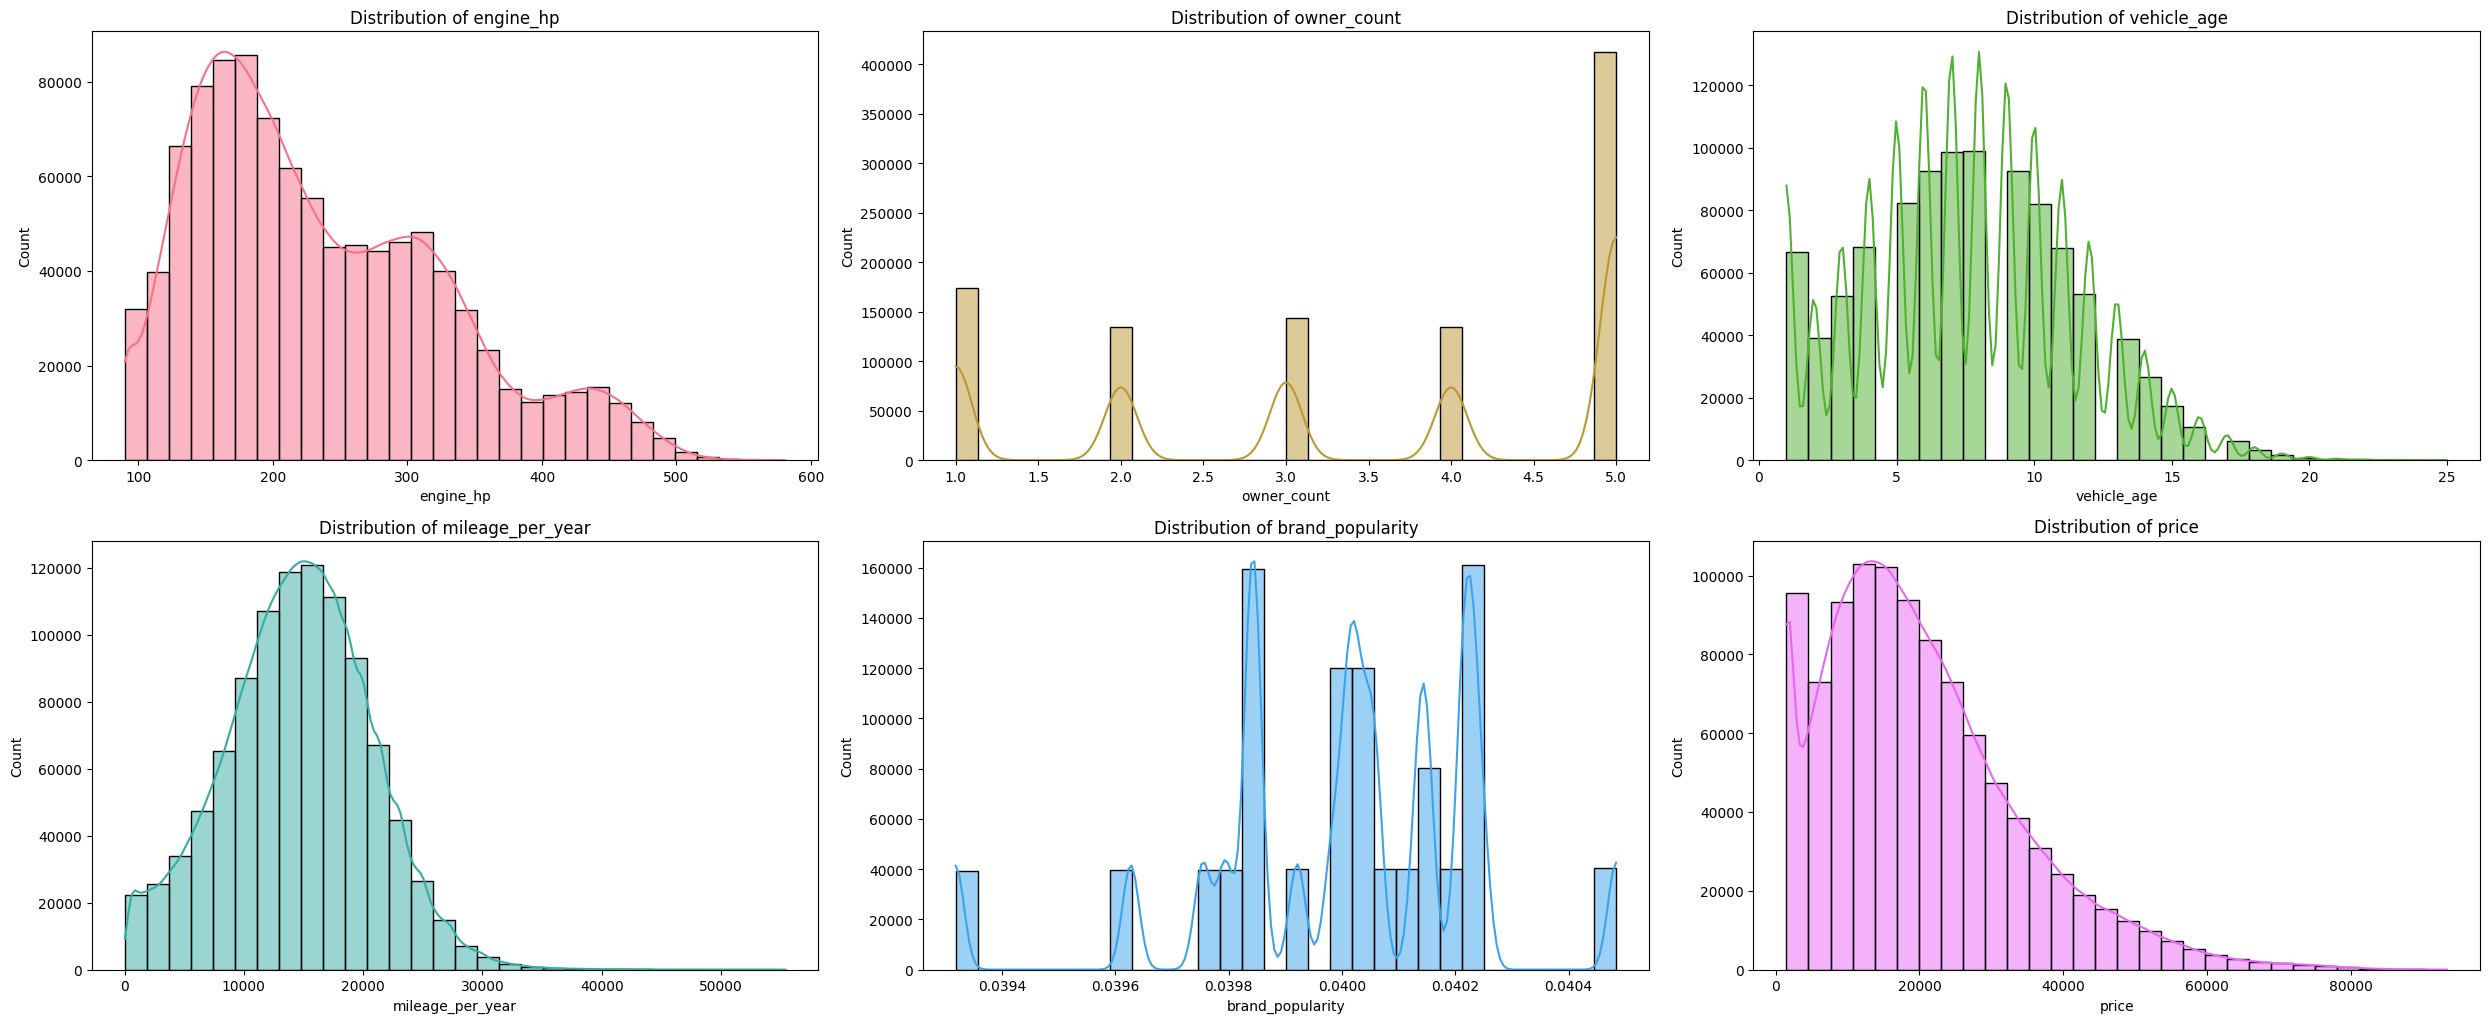

In [18]:
# Define color palette
palette = sns.color_palette("husl", len(numeric_data))

#to show Distribution
plt.figure(figsize=(25, 15))
for i, col in enumerate(numeric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Numerical Features')

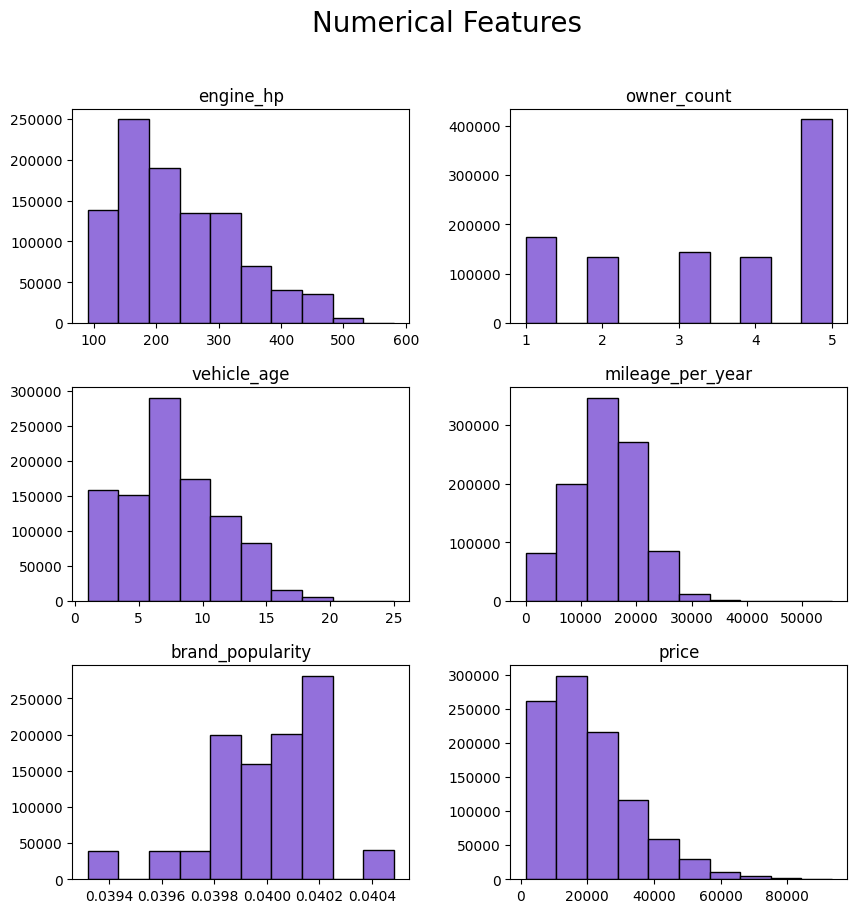

In [19]:
df[numeric_data].hist(figsize=(10,10), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

In [20]:
df['engine_hp'] = np.log1p(df['engine_hp'])

(array([ 35819.,  64471., 127457., 169353., 155416., 131740., 155202.,
         89476.,  63954.,   7112.]),
 array([4.51085951, 4.6964206 , 4.88198169, 5.06754279, 5.25310388,
        5.43866498, 5.62422607, 5.80978717, 5.99534826, 6.18090935,
        6.36647045]),
 <BarContainer object of 10 artists>)

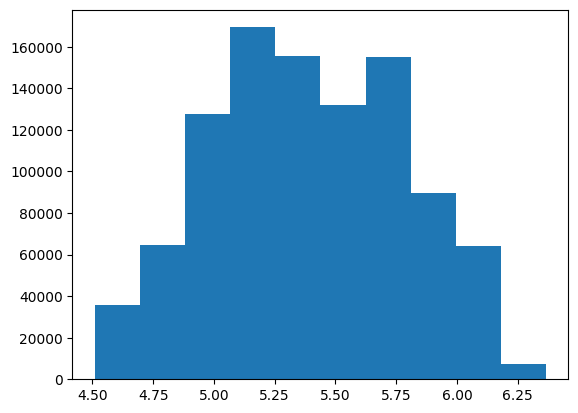

In [21]:
plt.hist(df['engine_hp'], bins=10)

In [22]:
df['brand_popularity'] = np.sqrt(df['brand_popularity'])
df['price'] = np.log1p(df['price'])

(array([ 39318.,      0.,  39627.,  39754., 199165., 159924., 160170.,
        321558.,      0.,  40484.]),
 array([0.19828767, 0.19857954, 0.19887141, 0.19916328, 0.19945515,
        0.19974702, 0.20003888, 0.20033075, 0.20062262, 0.20091449,
        0.20120636]),
 <BarContainer object of 10 artists>)

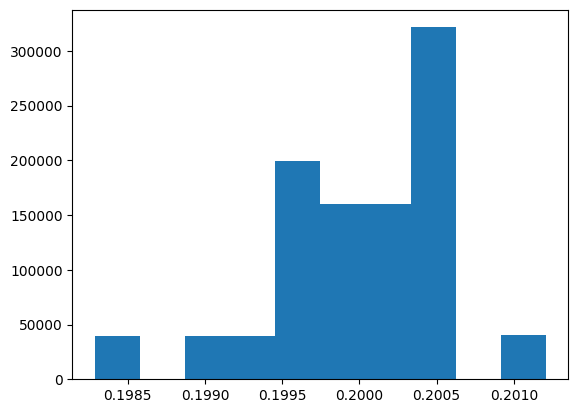

In [23]:
plt.hist(df['brand_popularity'], bins=10)

(array([ 56858.,  17761.,  33821.,  65689., 125741., 201197., 238210.,
        175768.,  74704.,  10251.]),
 array([ 7.31388683,  7.72698753,  8.14008823,  8.55318893,  8.96628962,
         9.37939032,  9.79249102, 10.20559172, 10.61869241, 11.03179311,
        11.44489381]),
 <BarContainer object of 10 artists>)

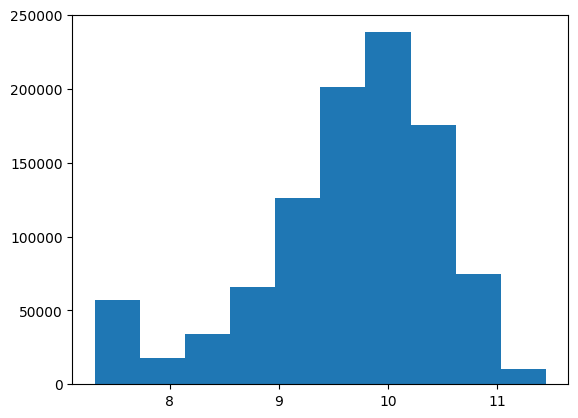

In [24]:
plt.hist(df['price'], bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f73a3a060>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f73a3a4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f739b0da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f73a3aae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f73a3ade0>],
 'means': []}

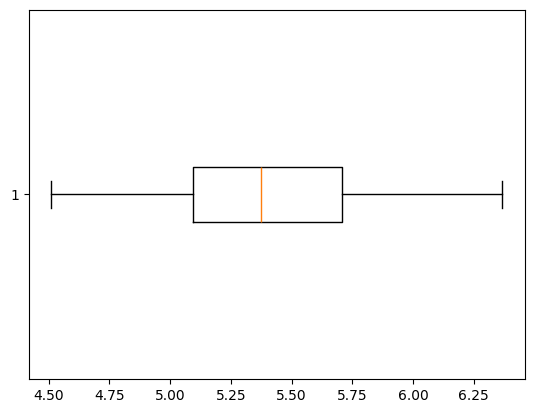

In [25]:
plt.boxplot(df['engine_hp'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f6fd0da00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f7785b050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f73d4a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f756b9160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f756bb4a0>],
 'means': []}

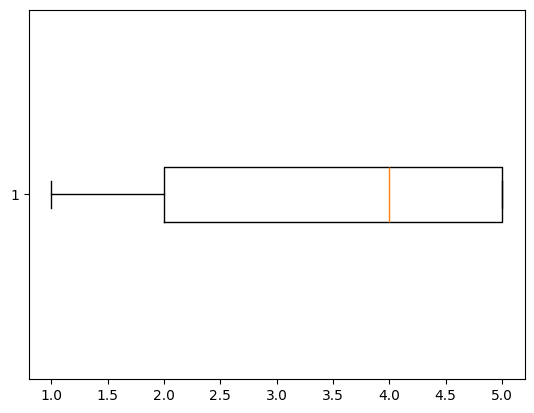

In [26]:
plt.boxplot(df['owner_count'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f739d7ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f73a39520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f6fe95400>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f73a3aea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f73a018e0>],
 'means': []}

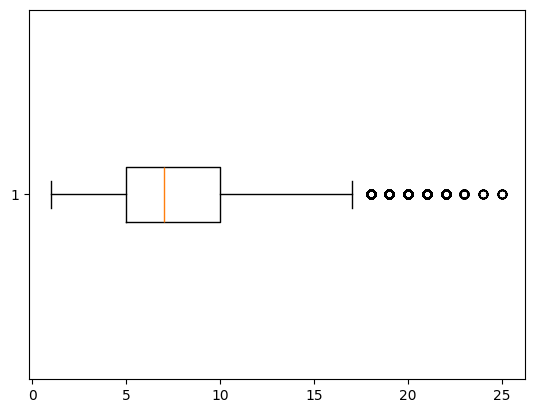

In [27]:
plt.boxplot(df['vehicle_age'], vert = False)

In [28]:
Q3vehicle_age = np.percentile(df['vehicle_age'], 75)
Q1vehicle_age = np.percentile(df['vehicle_age'], 25)
IQRvehicle_age = Q3vehicle_age - Q1vehicle_age

maxvehicle_age = Q3vehicle_age + (1.5 * IQRvehicle_age)
minvehicle_age = Q1vehicle_age - (1.5 * IQRvehicle_age)

df = df[(df['vehicle_age'] >= minvehicle_age) & (df['vehicle_age'] <= maxvehicle_age)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f738ad310>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f738ad8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f738acfe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f738ad700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f738adb80>],
 'means': []}

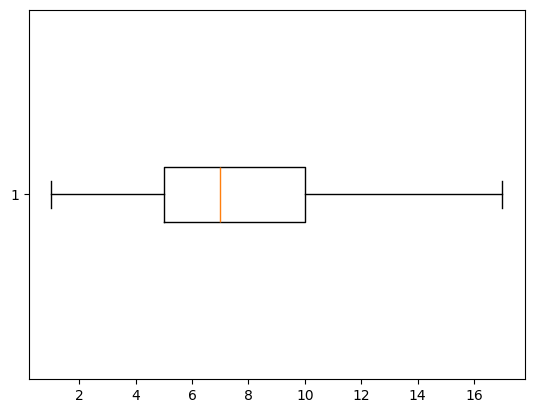

In [29]:
plt.boxplot(df['vehicle_age'], vert = False)

In [30]:
df.shape

(993971, 17)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f737c8bc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f737c9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f737c88f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f737c9700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f737c99d0>],
 'means': []}

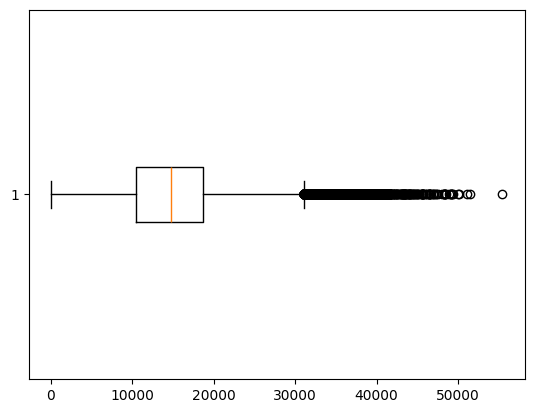

In [31]:
plt.boxplot(df['mileage_per_year'], vert = False)

In [32]:
Q3mileage_per_year = np.percentile(df['mileage_per_year'], 75)
Q1mileage_per_year = np.percentile(df['mileage_per_year'], 25)
IQRmileage_per_year = Q3mileage_per_year - Q1mileage_per_year

maxmileage_per_year = Q3mileage_per_year + (1.5 * IQRmileage_per_year)
minmileage_per_year = Q1mileage_per_year - (1.5 * IQRmileage_per_year)

df = df[(df['mileage_per_year'] >= minmileage_per_year) & (df['mileage_per_year'] <= maxmileage_per_year)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f7380f800>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f7380fd70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f7380f4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f73840320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f73840650>],
 'means': []}

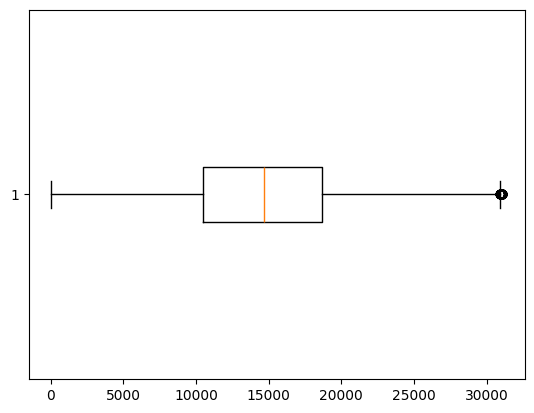

In [33]:
plt.boxplot(df['mileage_per_year'], vert = False)

In [34]:
df.shape

(989918, 17)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f738729c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f73872f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f738726c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f738735c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f738738c0>],
 'means': []}

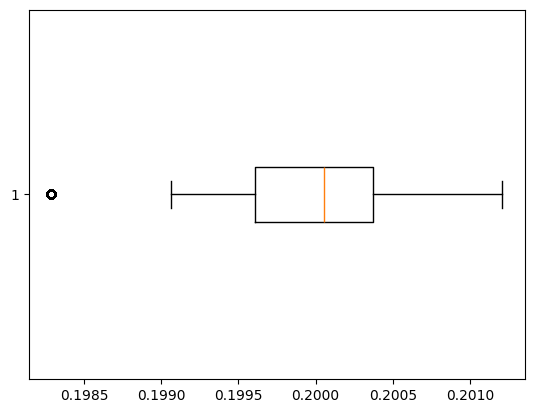

In [35]:
plt.boxplot(df['brand_popularity'], vert = False)

In [36]:
Q3brand_popularity = np.percentile(df['brand_popularity'], 75)
Q1brand_popularity = np.percentile(df['brand_popularity'], 25)
IQRbrand_popularity = Q3brand_popularity - Q1brand_popularity

maxbrand_popularity = Q3brand_popularity + (1.5 * IQRbrand_popularity)
minbrand_popularity = Q1brand_popularity - (1.5 * IQRbrand_popularity)

df = df[(df['brand_popularity'] >= minbrand_popularity) & (df['brand_popularity'] <= maxbrand_popularity)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f736e94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f736e9a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f736e91c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f736ea090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f736ea360>],
 'means': []}

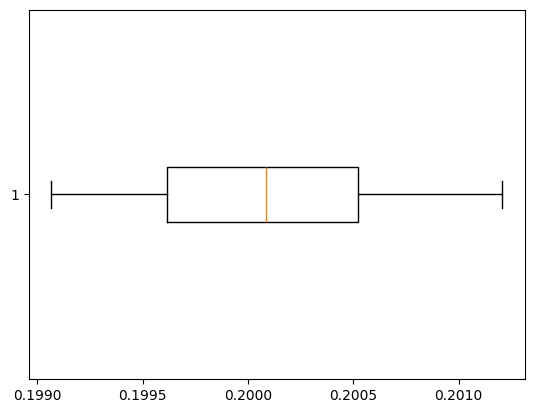

In [37]:
plt.boxplot(df['brand_popularity'], vert = False)

In [38]:
df.shape

(951020, 17)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f7372f6e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f7372fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f7372f410>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f737502f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f73750560>],
 'means': []}

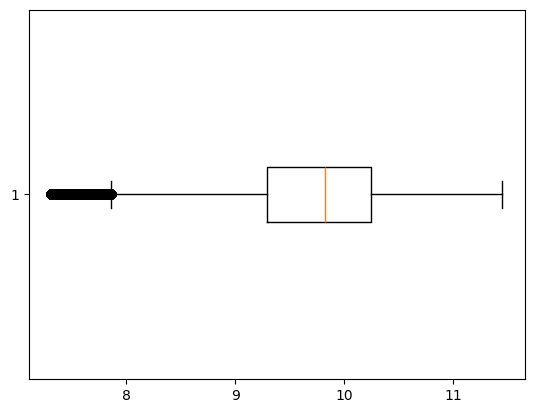

In [39]:
plt.boxplot(df['price'], vert = False)

In [40]:
for i in range(4):
    Q3price = np.percentile(df['price'], 75)
    Q1price = np.percentile(df['price'], 25)
    IQRprice = Q3price - Q1price

    maxprice = Q3price + (1.5 * IQRprice)
    minprice = Q1price - (1.5 * IQRprice)

    df = df[(df['price'] >= minprice) & (df['price'] <= maxprice)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f735a09e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f735a0f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f735a06b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f735a1400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f735a1700>],
 'means': []}

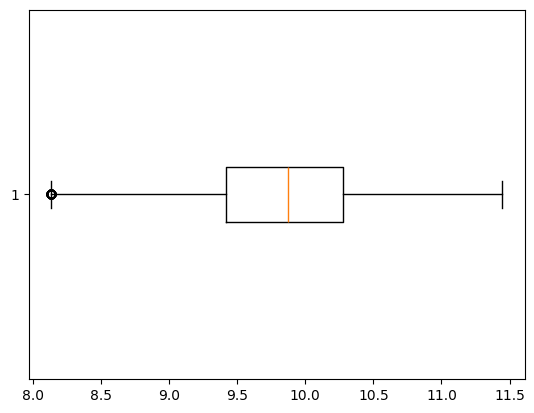

In [41]:
plt.boxplot(df['price'], vert = False)

In [42]:
df.shape

(889234, 17)

# **Categorical Data**

In [43]:
df[categorical_data]

,make,model,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,seller_type,condition,trim
0,Volkswagen,Jetta,Manual,Electric,RWD,Sedan,Blue,Brown,Dealer,Excellent,EX
1,Lexus,RX,Manual,Gasoline,FWD,Sedan,Silver,Beige,Dealer,Good,LX
2,Subaru,Crosstrek,Automatic,Diesel,AWD,Sedan,Silver,Beige,Dealer,Excellent,Touring
3,Cadillac,Lyriq,Manual,Gasoline,AWD,SUV,Black,Gray,Private,Good,Base
4,Toyota,Highlander,Manual,Diesel,FWD,Sedan,Red,Brown,Dealer,Excellent,Sport
...,...,...,...,...,...,...,...,...,...,...,...
999994,Subaru,Forester,Manual,Electric,AWD,SUV,Red,Brown,Dealer,Excellent,LX
999995,Jeep,Cherokee,Manual,Electric,FWD,SUV,Red,Black,Dealer,Excellent,Touring
999997,Mercedes-Benz,E-Class,Automatic,Electric,AWD,SUV,White,Brown,Dealer,Good,Sport
999998,Volvo,XC90,Automatic,Gasoline,AWD,Wagon,Blue,Beige,Dealer,Excellent,Limited


In [44]:
df.drop(['exterior_color', 'interior_color', 'trim'], axis=1, inplace=True)
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,make,model,transmission,fuel_type,drivetrain,body_type,seller_type,condition
0,Volkswagen,Jetta,Manual,Electric,RWD,Sedan,Dealer,Excellent
1,Lexus,RX,Manual,Gasoline,FWD,Sedan,Dealer,Good
2,Subaru,Crosstrek,Automatic,Diesel,AWD,Sedan,Dealer,Excellent
3,Cadillac,Lyriq,Manual,Gasoline,AWD,SUV,Private,Good
4,Toyota,Highlander,Manual,Diesel,FWD,Sedan,Dealer,Excellent
...,...,...,...,...,...,...,...,...
999994,Subaru,Forester,Manual,Electric,AWD,SUV,Dealer,Excellent
999995,Jeep,Cherokee,Manual,Electric,FWD,SUV,Dealer,Excellent
999997,Mercedes-Benz,E-Class,Automatic,Electric,AWD,SUV,Dealer,Good
999998,Volvo,XC90,Automatic,Gasoline,AWD,Wagon,Dealer,Excellent


In [45]:
for col in categorical_data:
  print(f'Unique values in {col} = {df[col].unique()}')
  print("---------------------------------------------------------------------------------------------------------------\n")

Unique values in make = ['Volkswagen' 'Lexus' 'Subaru' 'Cadillac' 'Toyota' 'Land Rover' 'Mazda'
 'Ram' 'Chrysler' 'GMC' 'Volvo' 'Audi' 'Chevrolet' 'Tesla' 'Ford'
 'Porsche' 'Acura' 'Nissan' 'Kia' 'Jeep' 'BMW' 'Dodge' 'Mercedes-Benz'
 'Honda']
---------------------------------------------------------------------------------------------------------------

Unique values in model = ['Jetta' 'RX' 'Crosstrek' 'Lyriq' 'Highlander' 'Defender' 'Mazda3' 'Atlas'
 '2500' '300' 'Yukon' 'XT5' 'Range Rover' 'S60' 'Q5' 'Silverado' 'Model 3'
 '3500' 'Camaro' 'Explorer' '911' 'MDX' 'Sentra' 'Camry' 'Mustang'
 'Discovery' 'R8' 'Forte' 'Equinox' 'Model Y' '1500' 'Grand Cherokee'
 'Mazda6' 'M3' 'Malibu' 'Pacifica' 'Panamera' 'Pathfinder' 'V60' 'A6'
 'Sorento' 'Cherokee' 'IS' 'Macan' '3 Series' 'Durango' 'Titan' 'Tiguan'
 'TLX' 'S-Class' 'E-Class' 'RDX' 'Corolla' 'RAV4' 'F-150' 'X5' 'Outback'
 'Cayenne' 'Rogue' 'Acadia' 'ES' 'Sportage' 'Tacoma' 'CT5' 'Sierra'
 'Wrangler' 'Altima' 'Model S' 'GLE' 'NX' 'Tahoe

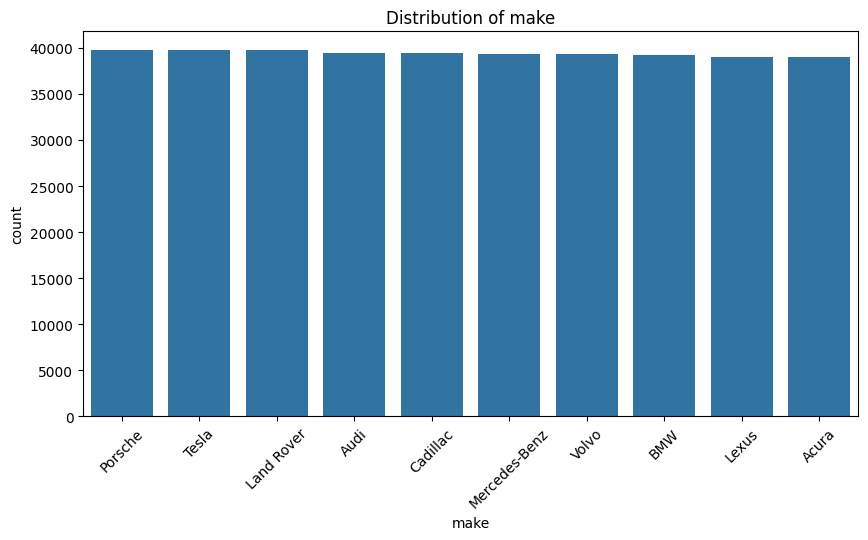

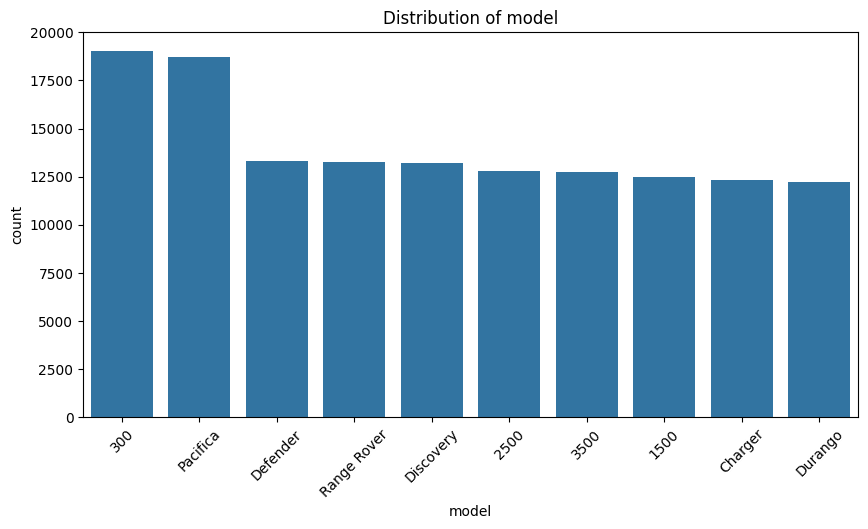

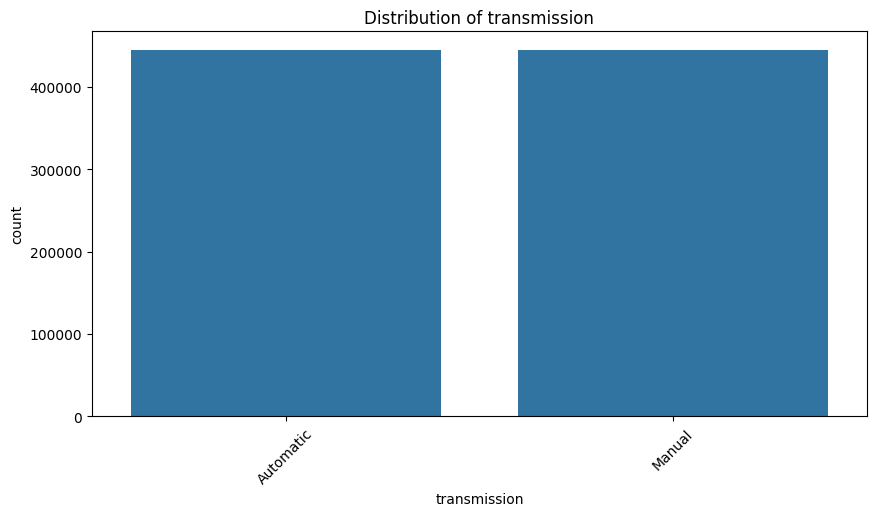

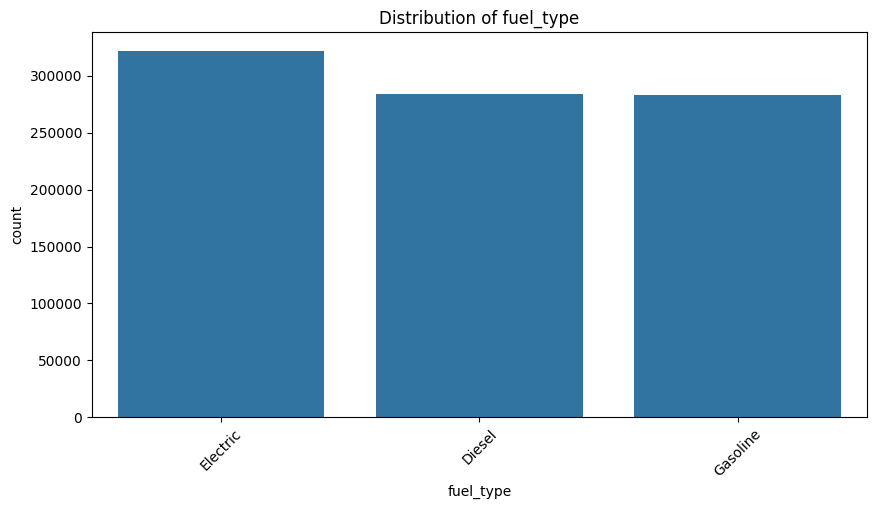

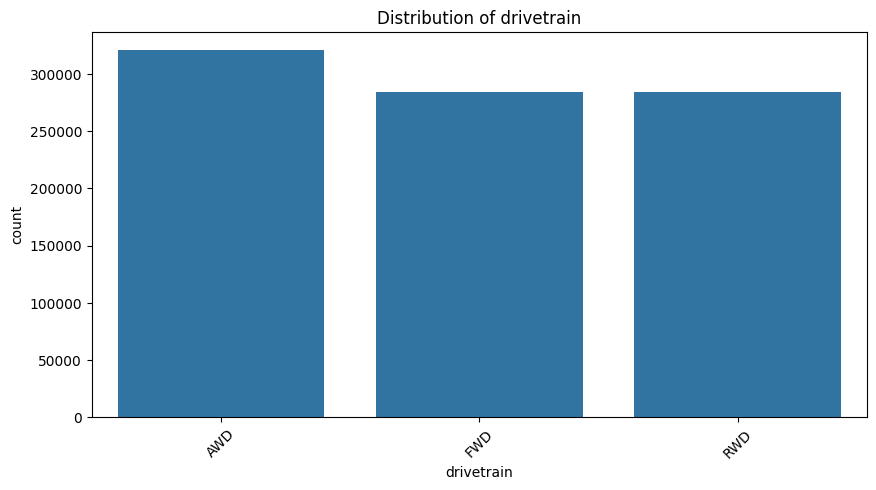

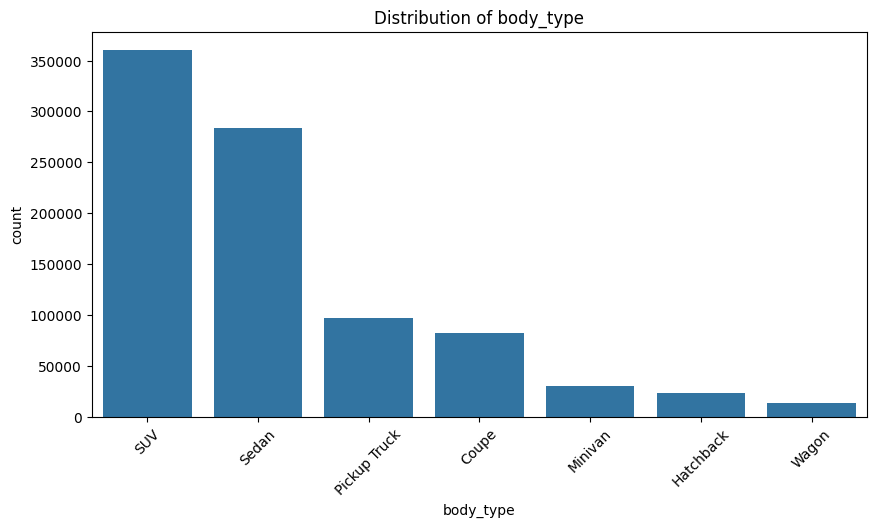

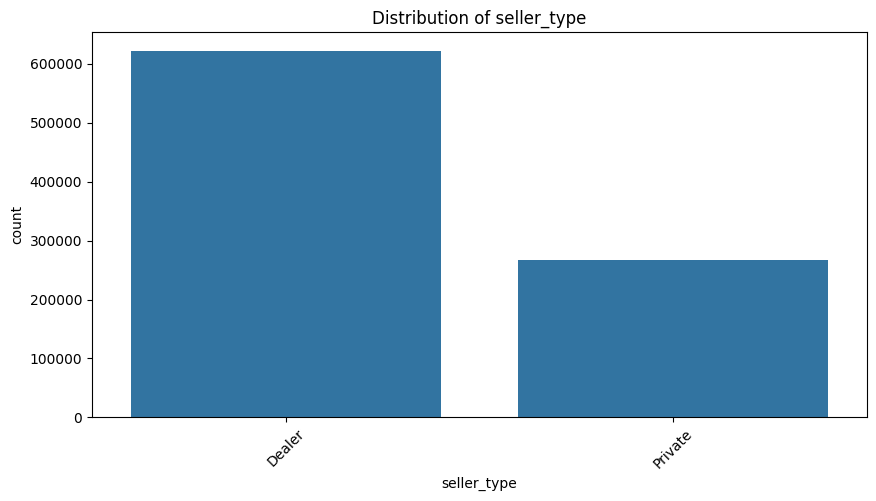

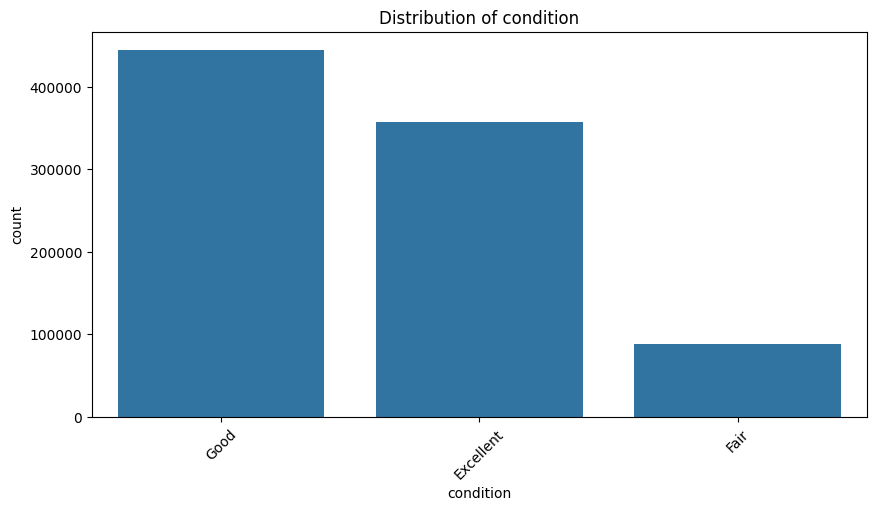

In [46]:
categorical_cols = ['make', 'model', 'transmission', 'fuel_type',
                    'drivetrain', 'body_type',
                    'seller_type', 'condition']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])  # top 10 categories
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

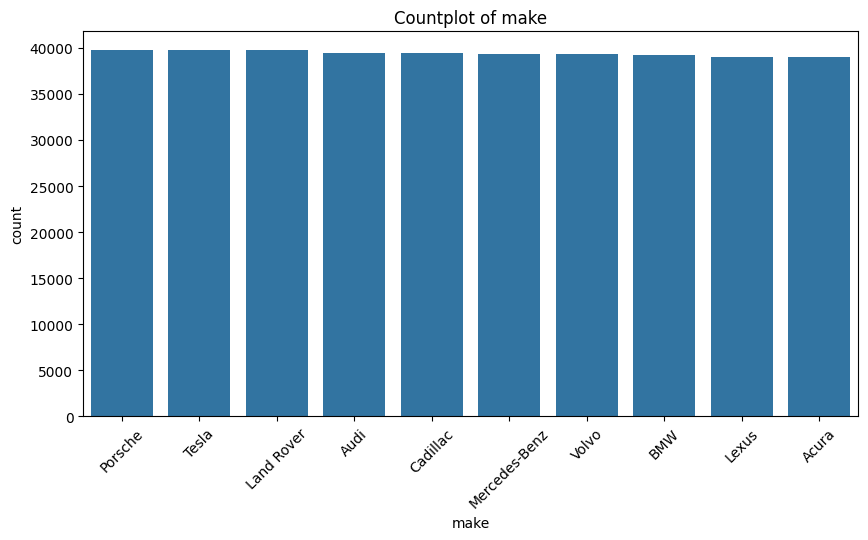

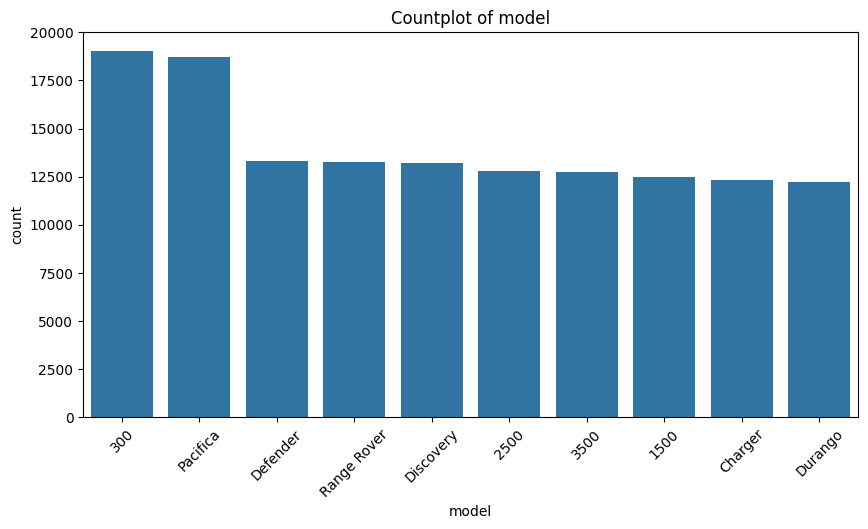

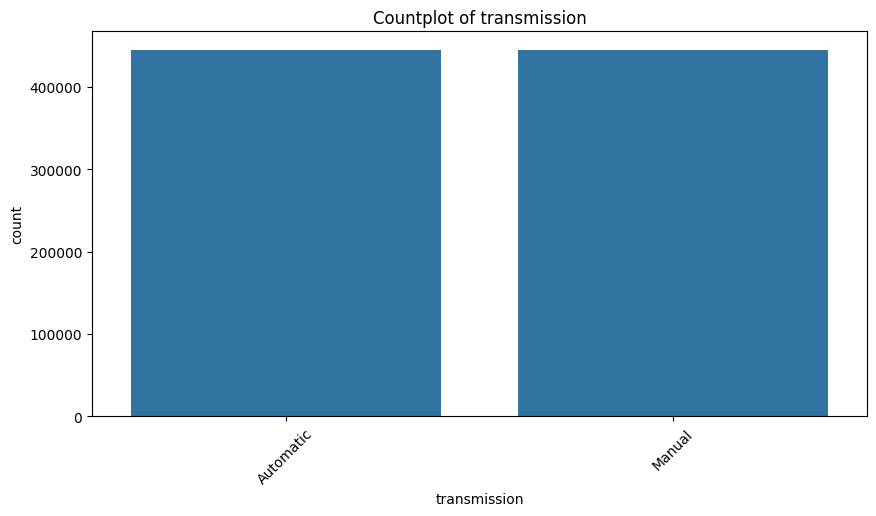

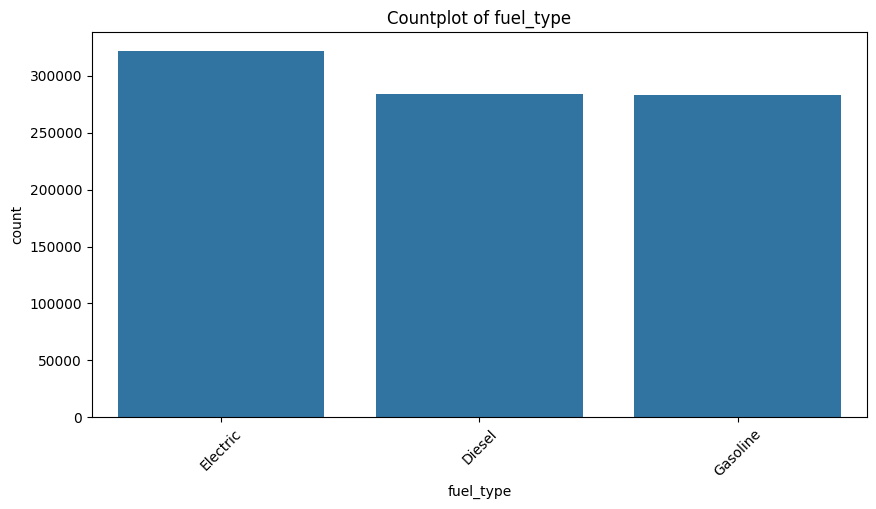

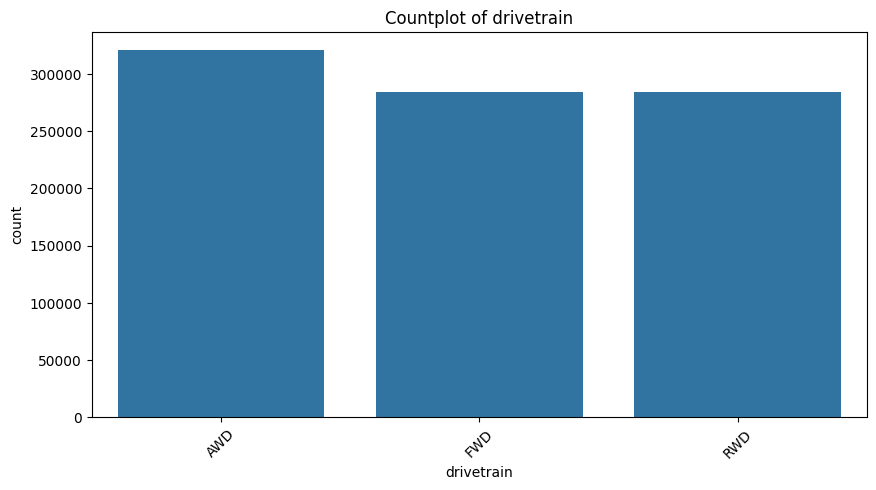

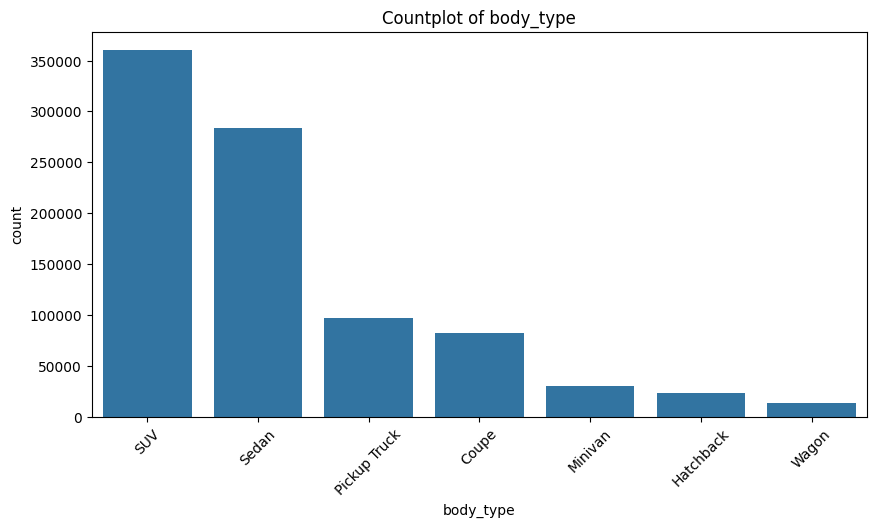

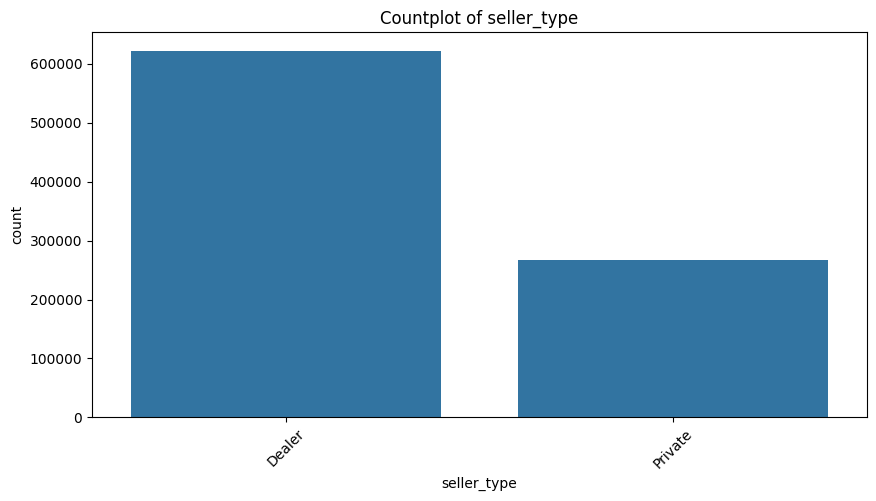

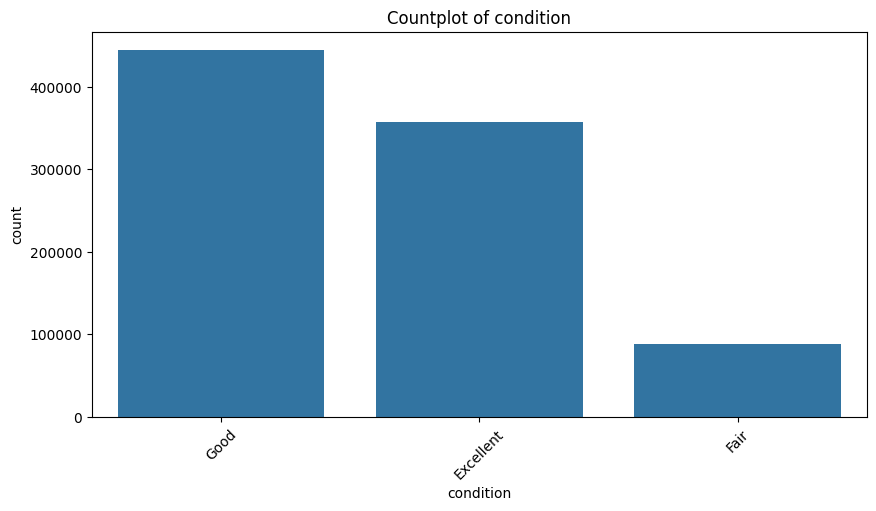

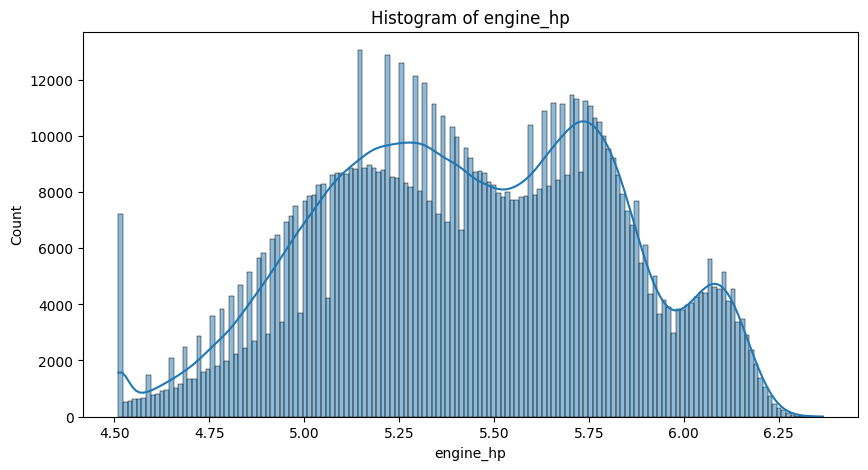

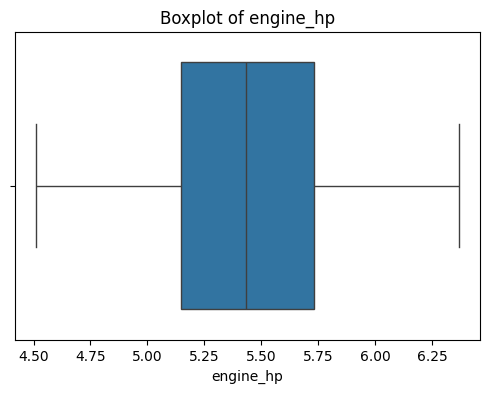

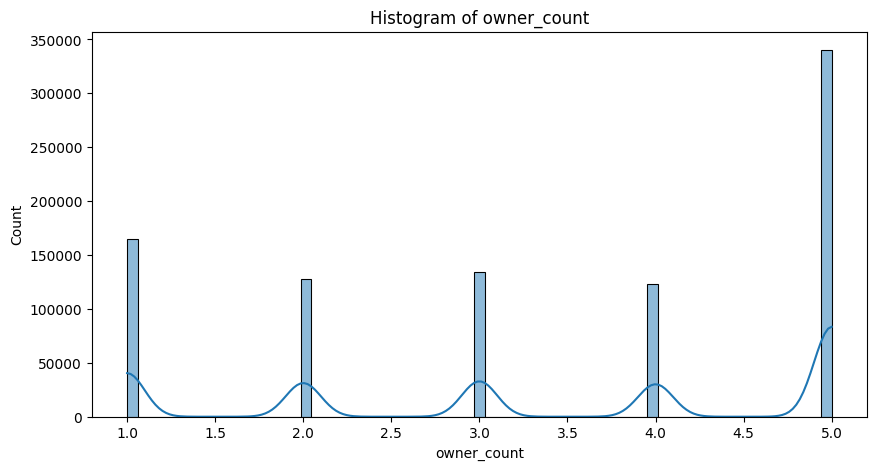

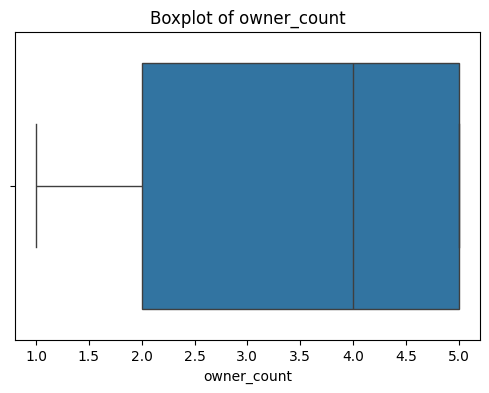

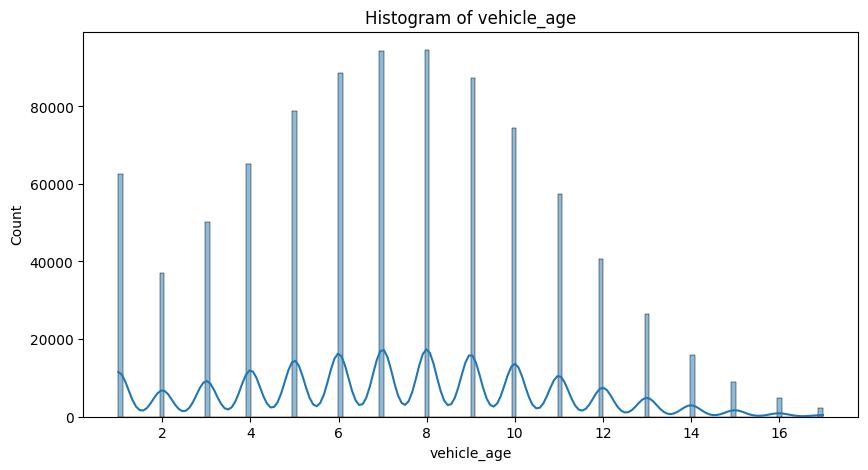

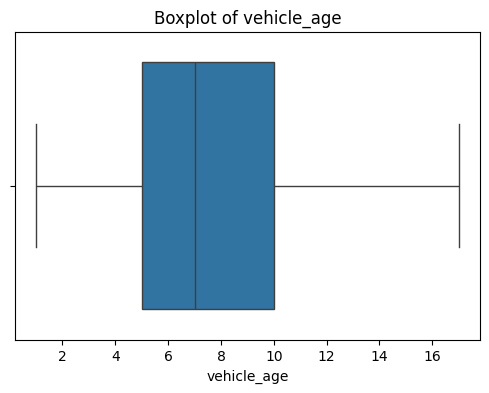

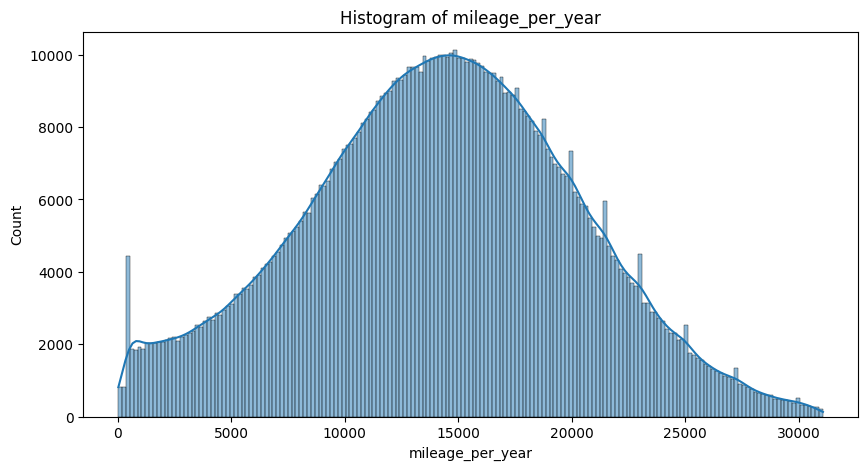

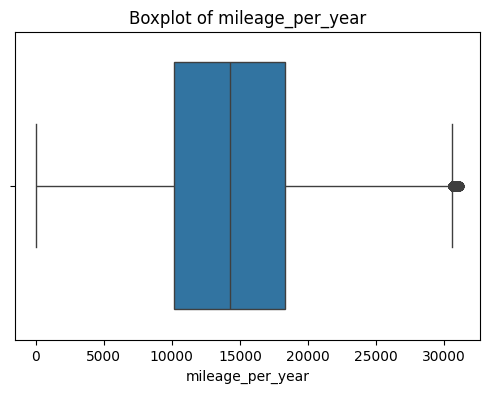

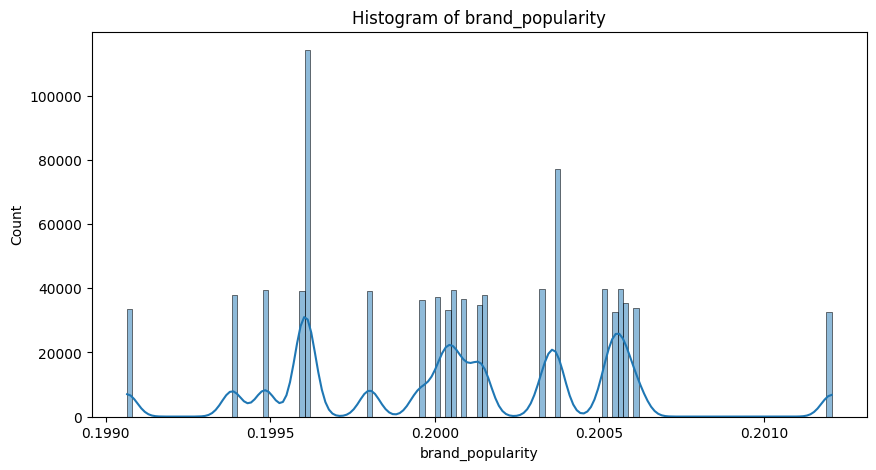

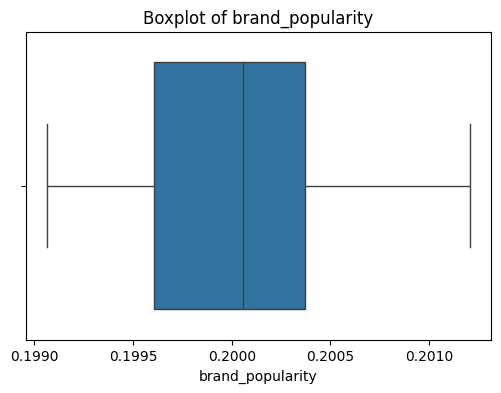

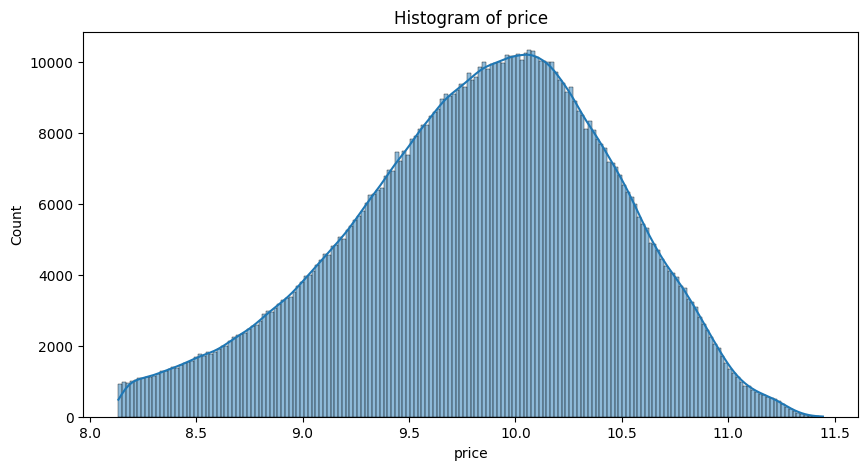

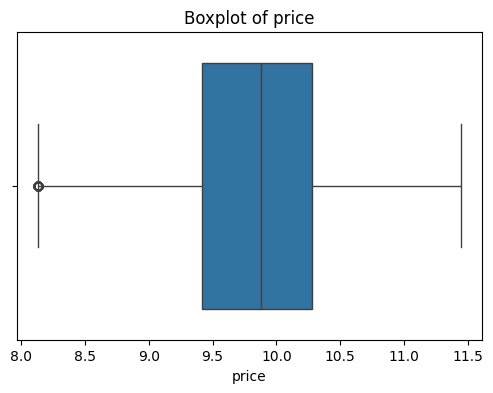

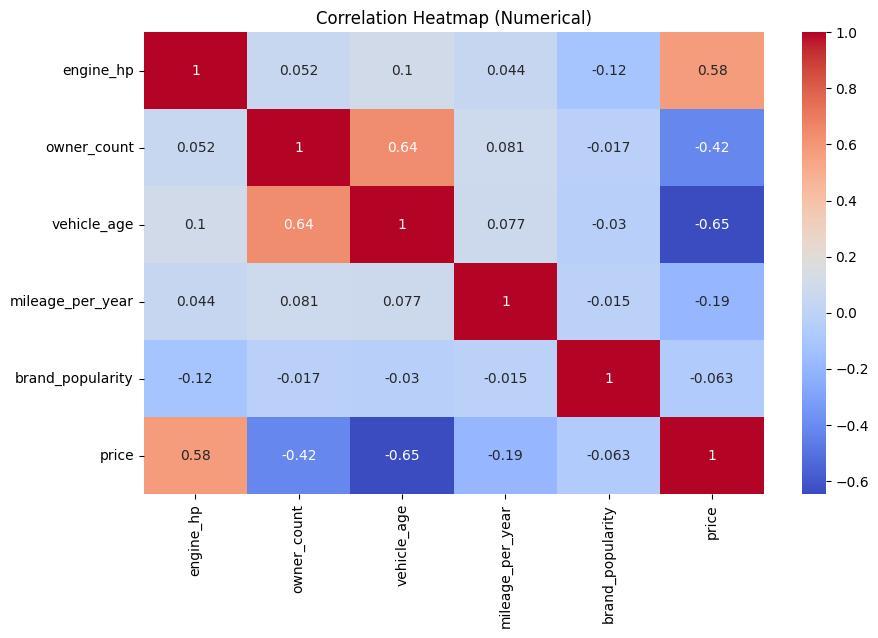

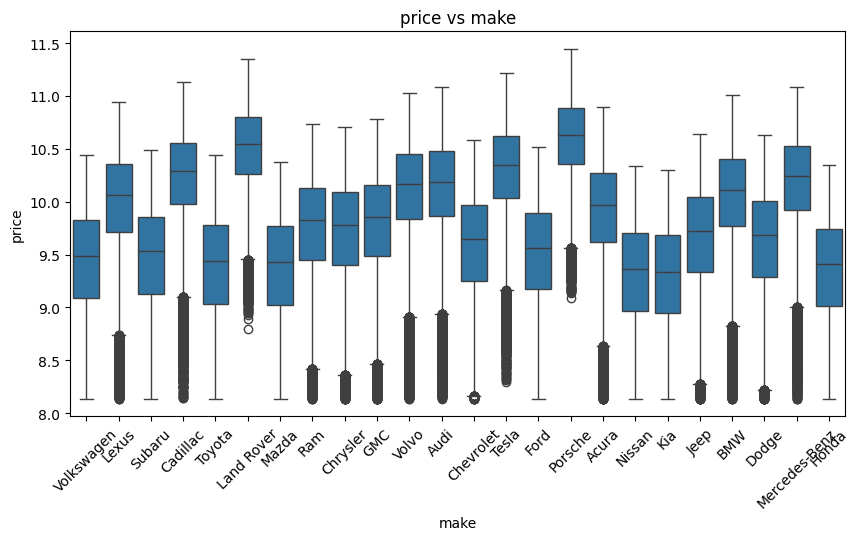

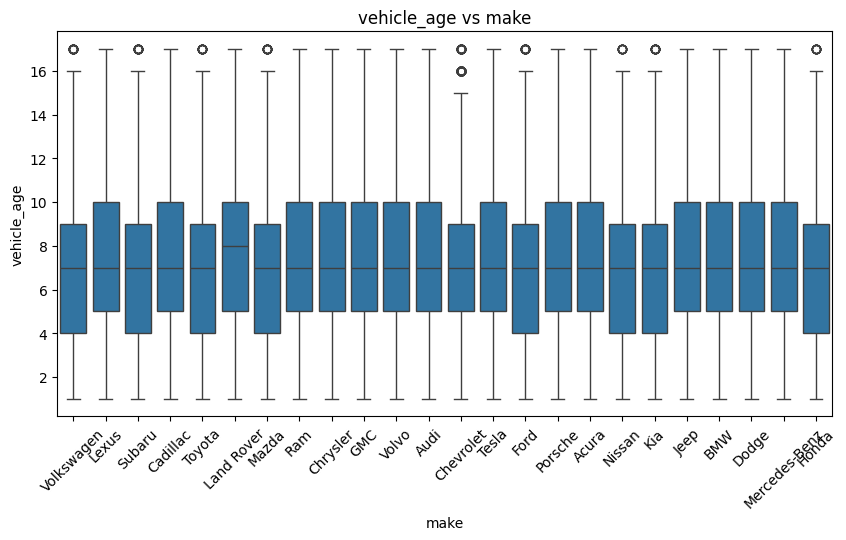

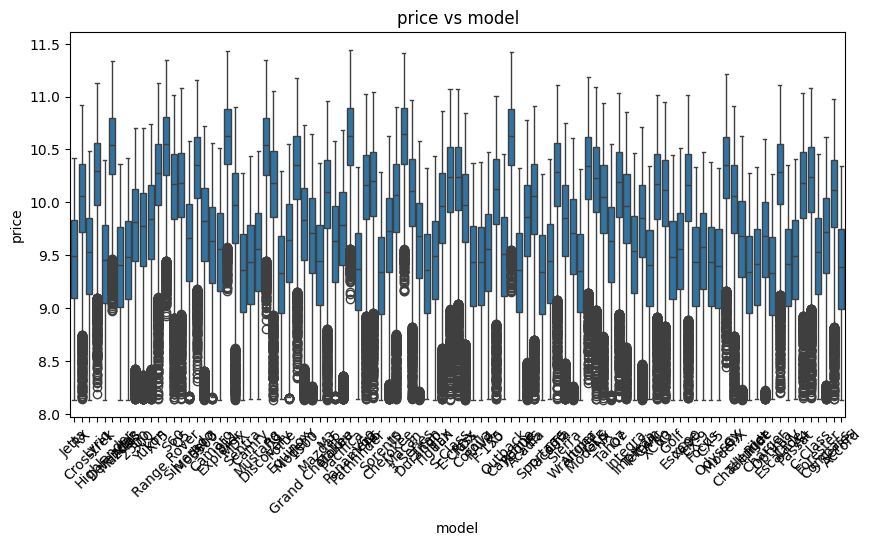

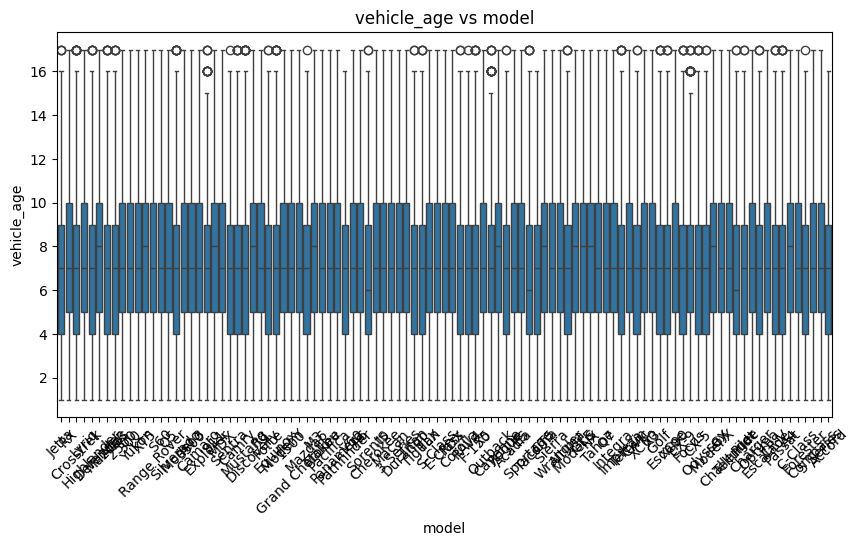

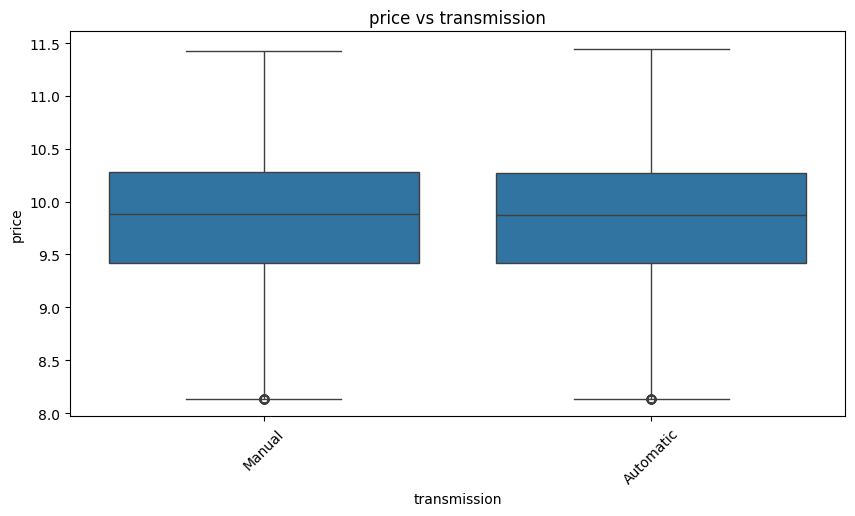

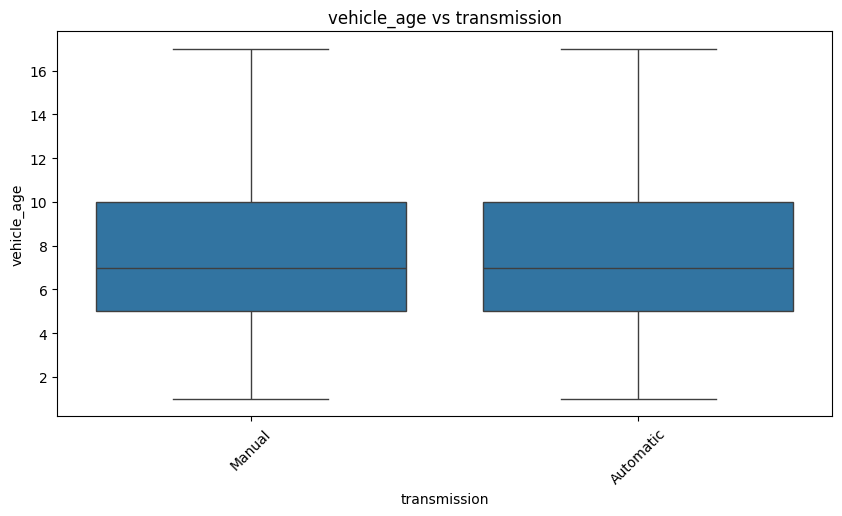

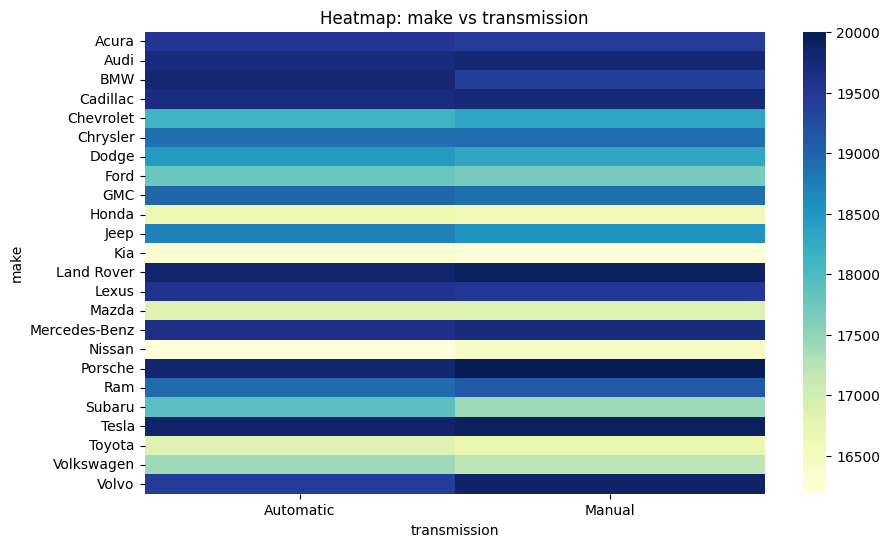

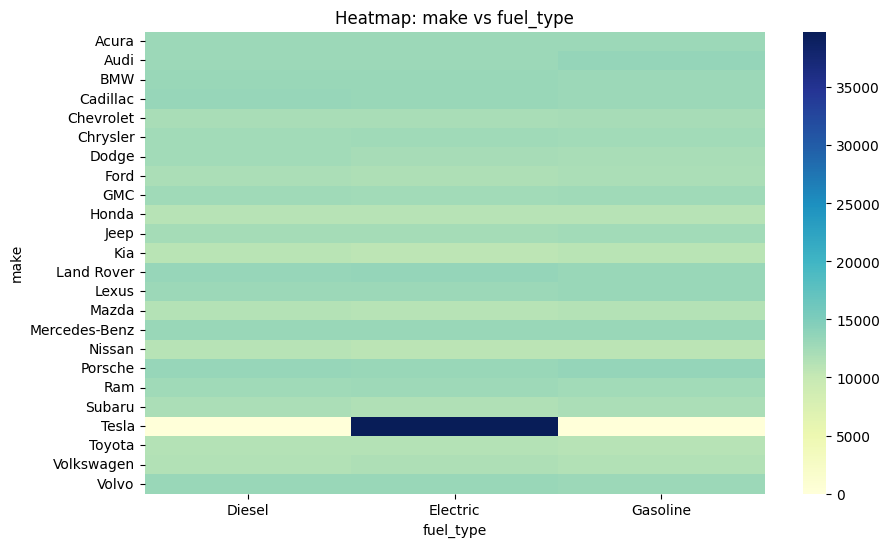

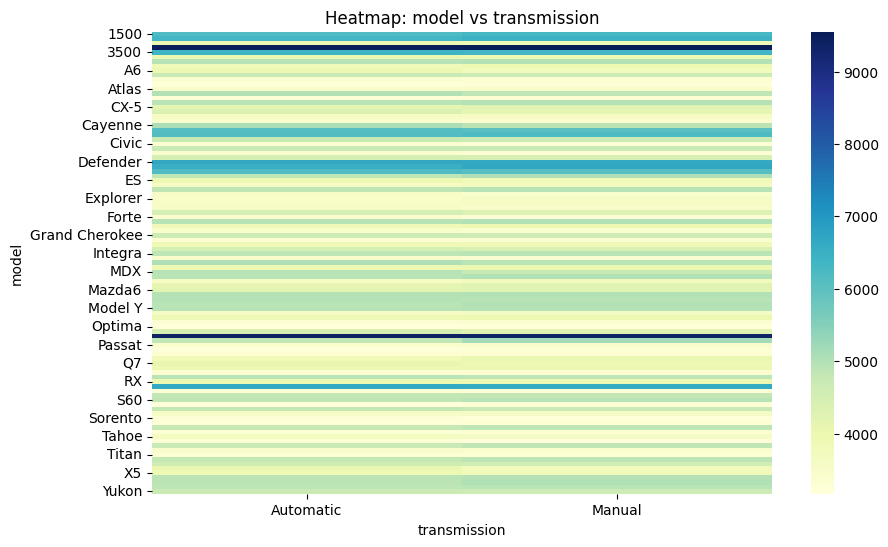

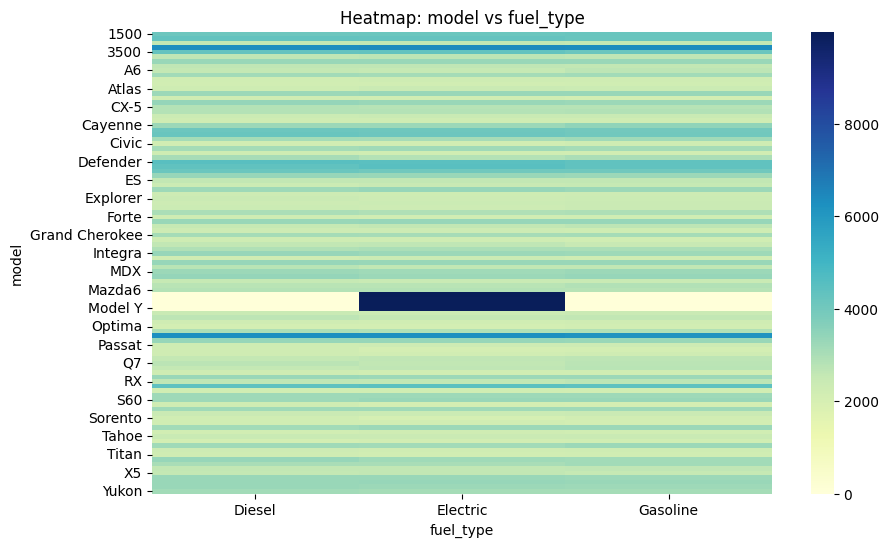

In [47]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1. Univariate Categorical
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 2. Univariate Numerical
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 3. Correlation Heatmap (Numerical)
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical)")
plt.show()

# 4. Example Categorical vs Numerical
for cat in categorical_cols[:3]:  # أول 3 فقط
    for num in ['price','mileage','vehicle_age']:
        if num in df.columns:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=cat, y=num, data=df)
            plt.title(f"{num} vs {cat}")
            plt.xticks(rotation=45)
            plt.show()

# 5. Example Categorical vs Categorical
for cat1 in categorical_cols[:2]:
    for cat2 in categorical_cols[2:4]:
        ct = pd.crosstab(df[cat1], df[cat2])
        plt.figure(figsize=(10,6))
        sns.heatmap(ct, cmap="YlGnBu")
        plt.title(f"Heatmap: {cat1} vs {cat2}")
        plt.show()

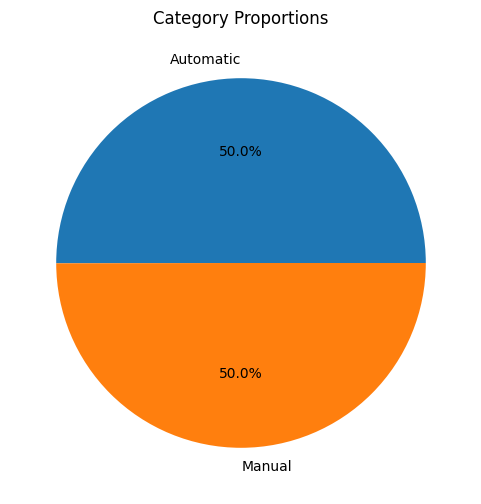

In [48]:
df["transmission"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

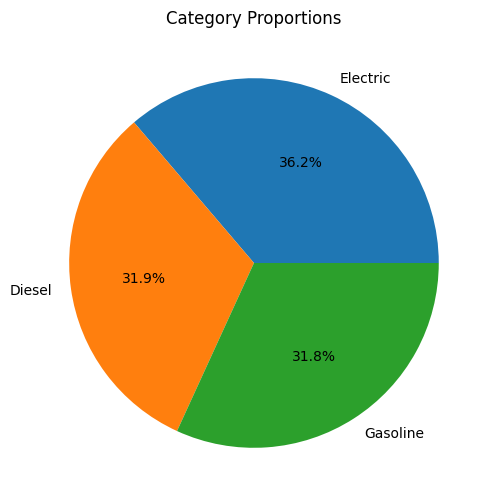

In [49]:
df["fuel_type"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

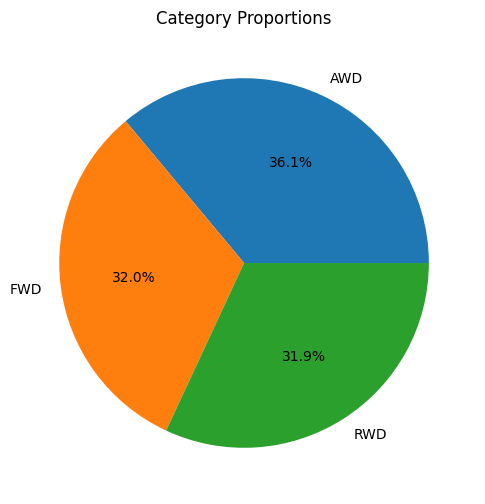

In [50]:
df["drivetrain"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

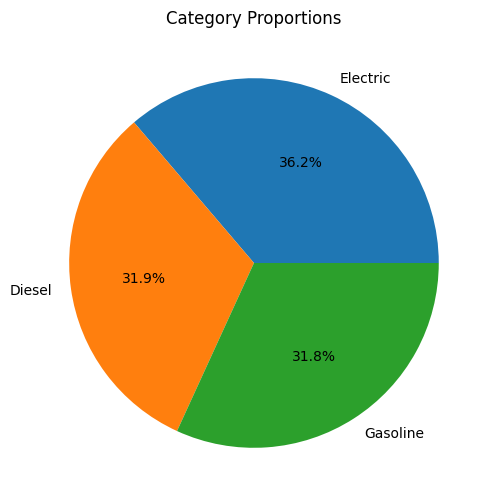

In [51]:
df["fuel_type"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

In [52]:
df

,make,model,engine_hp,transmission,fuel_type,drivetrain,body_type,owner_count,seller_type,condition,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,5.159055,Manual,Electric,RWD,Sedan,5,Dealer,Excellent,9,20433.666667,0.200135,8.883158
1,Lexus,RX,5.866468,Manual,Gasoline,FWD,Sedan,5,Dealer,Good,15,15776.200000,0.199802,8.841131
2,Subaru,Crosstrek,5.241747,Automatic,Diesel,AWD,Sedan,5,Dealer,Excellent,9,11466.555556,0.200574,9.385690
3,Cadillac,Lyriq,5.826000,Manual,Gasoline,AWD,SUV,3,Private,Good,9,13209.888889,0.199617,10.165305
4,Toyota,Highlander,5.283204,Manual,Diesel,FWD,Sedan,5,Dealer,Excellent,7,29167.142857,0.199065,9.006055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,Subaru,Forester,5.164786,Manual,Electric,AWD,SUV,5,Dealer,Excellent,11,16211.909091,0.200574,8.607041
999995,Jeep,Cherokee,5.176150,Manual,Electric,FWD,SUV,2,Dealer,Excellent,10,13040.700000,0.200015,9.299256
999997,Mercedes-Benz,E-Class,5.828946,Automatic,Electric,AWD,SUV,2,Dealer,Good,2,1982.000000,0.199484,10.797194
999998,Volvo,XC90,5.743003,Automatic,Gasoline,AWD,Wagon,2,Dealer,Excellent,6,13945.666667,0.199605,10.379626


# **Train & Test Split**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(['price'], axis=1)
y = df['price']

In [55]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (711387, 13) (711387,)
Test shape: (177847, 13) (177847,)


# **Encode & Scaling The Data**

In [57]:
le = LabelEncoder()

for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [58]:
numeric_data = X.select_dtypes(include=['number']).columns
robust_scaler = RobustScaler()
X_train[numeric_data] = robust_scaler.fit_transform(X_train[numeric_data])
X_test[numeric_data] = robust_scaler.transform(X_test[numeric_data])

In [59]:
X_train

,make,model,engine_hp,transmission,fuel_type,drivetrain,body_type,owner_count,seller_type,condition,vehicle_age,mileage_per_year,brand_popularity
817426,23,80,0.527922,0,1,1,6,-1.000000,0,2,-1.2,-1.044177,-0.588698
274317,22,68,-0.410969,1,0,1,5,-0.333333,0,0,-0.4,0.745600,0.104519
601378,6,30,-0.364201,0,1,2,5,-0.666667,0,2,-0.2,-0.975486,0.042466
310635,15,79,0.555059,1,2,1,4,-1.000000,0,2,-1.2,1.130856,-0.745909
614690,23,98,0.210134,0,1,0,4,0.000000,0,2,0.2,1.514930,-0.588698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291871,20,59,1.010749,0,1,0,4,-1.000000,0,0,-0.6,0.202825,0.665593
411747,7,61,-0.318680,0,0,2,5,0.333333,1,0,0.4,0.072437,-0.588698
148497,3,99,0.426490,0,0,0,4,0.333333,0,2,1.6,0.417788,-0.572328
755047,12,77,0.998335,0,2,1,4,-0.333333,0,2,-0.6,-0.614965,0.362371


# **Model**

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

print("KNN Train R2:", r2_score(y_train, train_pred))
print("KNN Test R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


KNN Train R2: 0.932983183353646
KNN Test R2: 0.8978806437658838
MSE: 0.03983784120658774
RMSE: 0.1995941913147468
MAE: 0.14738400055884107


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

print("Price Random Forest Train R2:", r2_score(y_train, train_pred))
print("Price Random Forest R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Price Random Forest Train R2: 0.9966367923782625
Price Random Forest R2: 0.9759389786888696
MSE: 0.009386458959490624


In [62]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# from sklearn.preprocessing import RobustScaler

# numeric_cols = X_train.select_dtypes(include=['number']).columns
# scaler = RobustScaler()

# X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# rf_clf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=None,
#     random_state=42
# )

# rf_clf.fit(X_train, y_train)

# y_pred = rf_clf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [63]:
import joblib
joblib.dump(rf, r"rf.pkl")

['rf.pkl']

Top 10 Important Features for Sleep_Quality:
             Feature  Importance
10       vehicle_age    0.464677
2          engine_hp    0.408579
11  mileage_per_year    0.064042
0               make    0.024293
12  brand_popularity    0.021216
1              model    0.005310
9          condition    0.004389
7        owner_count    0.001551
8        seller_type    0.001492
5         drivetrain    0.001264


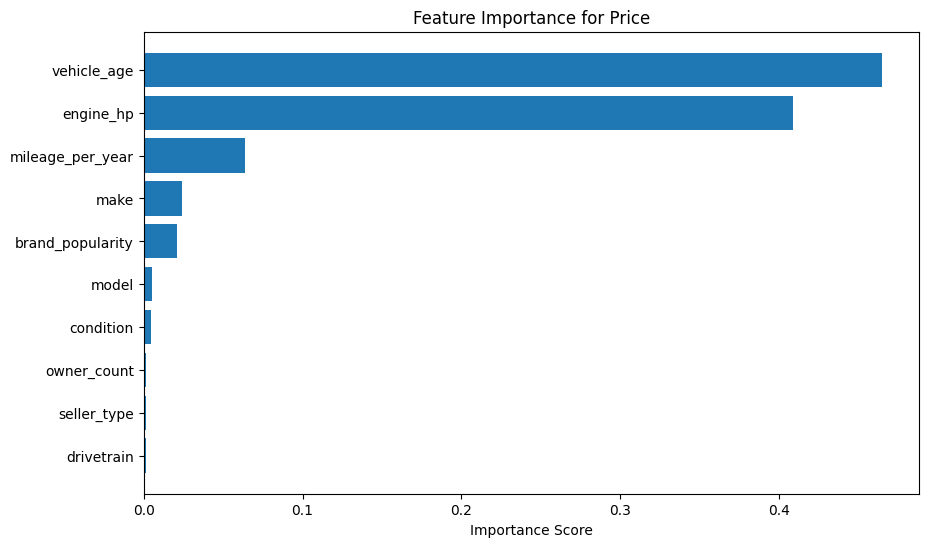

In [64]:
# Get feature importances
importances_Price = rf.feature_importances_

# Create a DataFrame for better visualization
feat_imp_Price = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_Price
}).sort_values(by="Importance", ascending=False)

# Print top 10 features
print("Top 10 Important Features for Sleep_Quality:")
print(feat_imp_Price.head(10))

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(feat_imp_Price["Feature"].head(10), feat_imp_Price["Importance"].head(10))
plt.gca().invert_yaxis()  # invert axis for descending order
plt.title("Feature Importance for Price")
plt.xlabel("Importance Score")
plt.show()